# Nicht generatives Trainig mit DeepHull simple loss

In [37]:
import torch

from script.Networks import ICNN, SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn
from script.eval import Plots_for
from script.Verification import verification
import numpy as np

In [38]:
sequential = False
epochs = 1
batch_size = 1
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]
if not sequential:
    icnn = ICNN([2, 10, 10, 1])
else:
    icnn = SequentialNN([2, 10, 10, 1])

In [39]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range)#samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

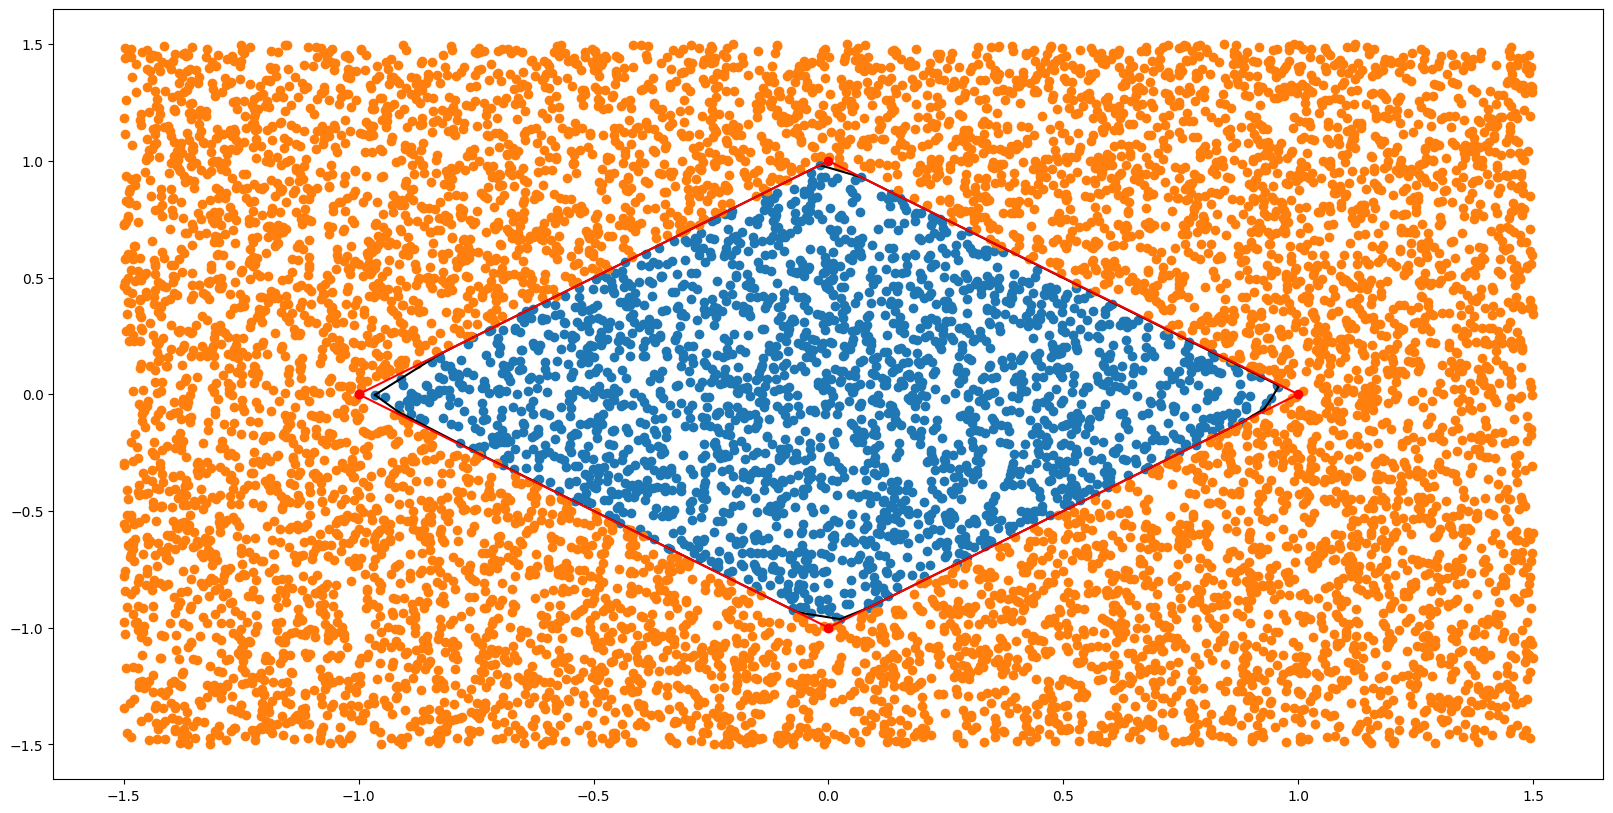

In [40]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range)
plots.plt_initial()


In [41]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, sequential=sequential, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 1.2319241762161255
batch = 100, mean loss = 1.4709391865399803
batch = 200, mean loss = 1.4479728616885286
batch = 300, mean loss = 1.4019910120884842
batch = 400, mean loss = 1.3656717720174432
batch = 500, mean loss = 1.3305251952892767
batch = 600, mean loss = 1.2940554706110137
batch = 700, mean loss = 1.2595901637206575
batch = 800, mean loss = 1.2272834452648138
batch = 900, mean loss = 1.189335898937581
batch = 1000, mean loss = 1.1601995377392917
batch = 1100, mean loss = 1.130441365325375
batch = 1200, mean loss = 1.10208941168531
batch = 1300, mean loss = 1.0737293106972667
batch = 1400, mean loss = 1.0478960895734035
batch = 1500, mean loss = 1.0219608478590618
batch = 1600, mean loss = 0.9962191168290984
batch = 1700, mean loss = 0.9701685871291623
batch = 1800, mean loss = 0.9477164015662067
batch = 1900, mean loss = 0.9281065806722967
batch = 2000, mean loss = 0.9067855280512633
batch = 2100, mean loss = 0.8891653888271515
batch = 22

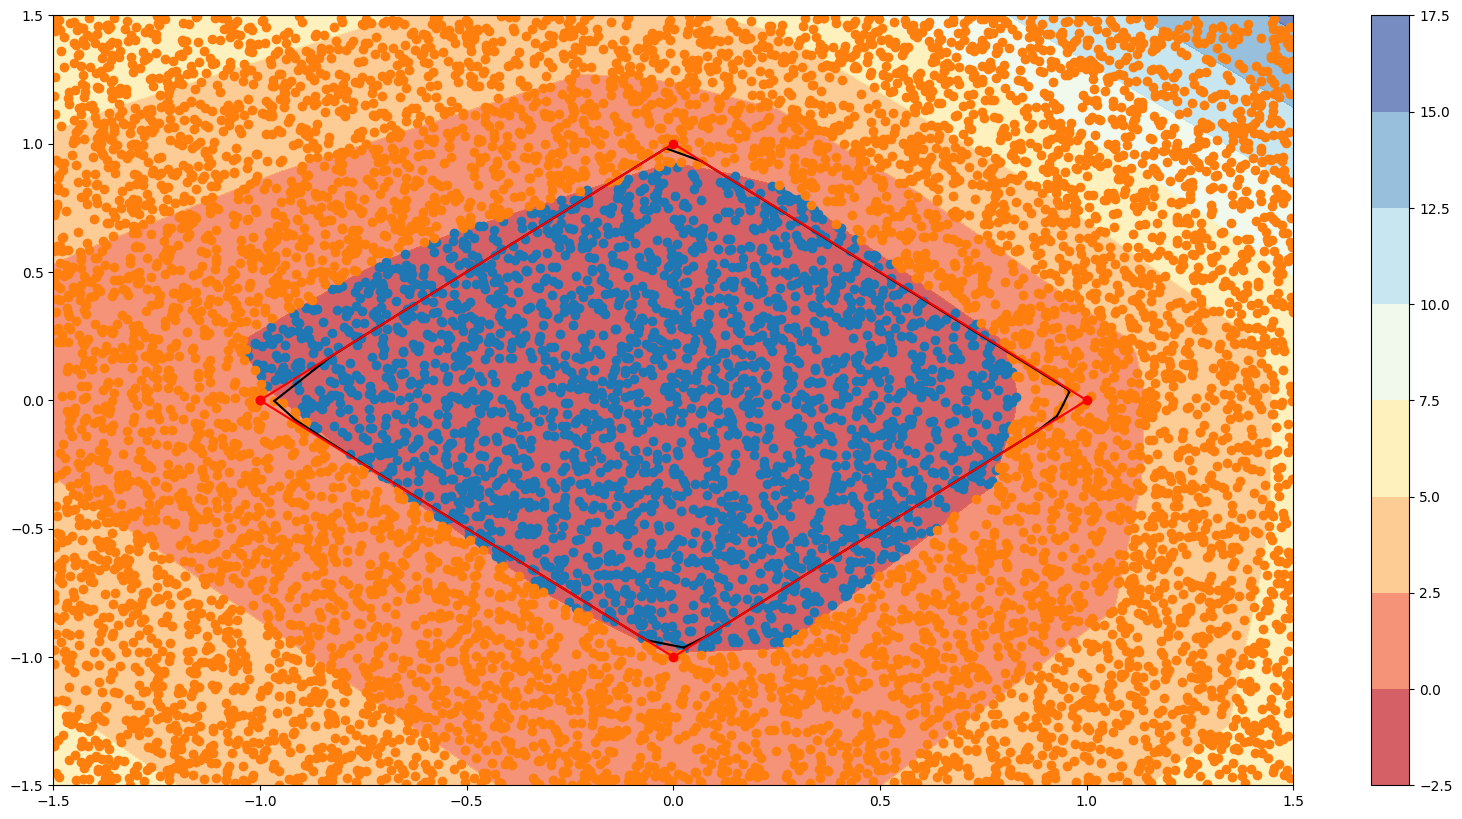

In [42]:
plots.plt_mesh()

In [44]:
A, b = Rhombus().get_A(), Rhombus().get_b()
result = verification(icnn, A=A, b=b, sequential=sequential)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 138 rows, 96 columns and 387 nonzeros
Model fingerprint: 0xacaf5274
Variable types: 76 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [3e-04, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+03]
  RHS range        [4e-03, 1e+03]
Found heuristic solution: objective -1.4709425
Presolve removed 74 rows and 51 columns
Presolve time: 0.00s
Presolved: 64 rows, 45 columns, 248 nonzeros
Variable types: 29 continuous, 16 integer (16 binary)

Root relaxation: objective 9.640946e+00, 35 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    9.64095    0 

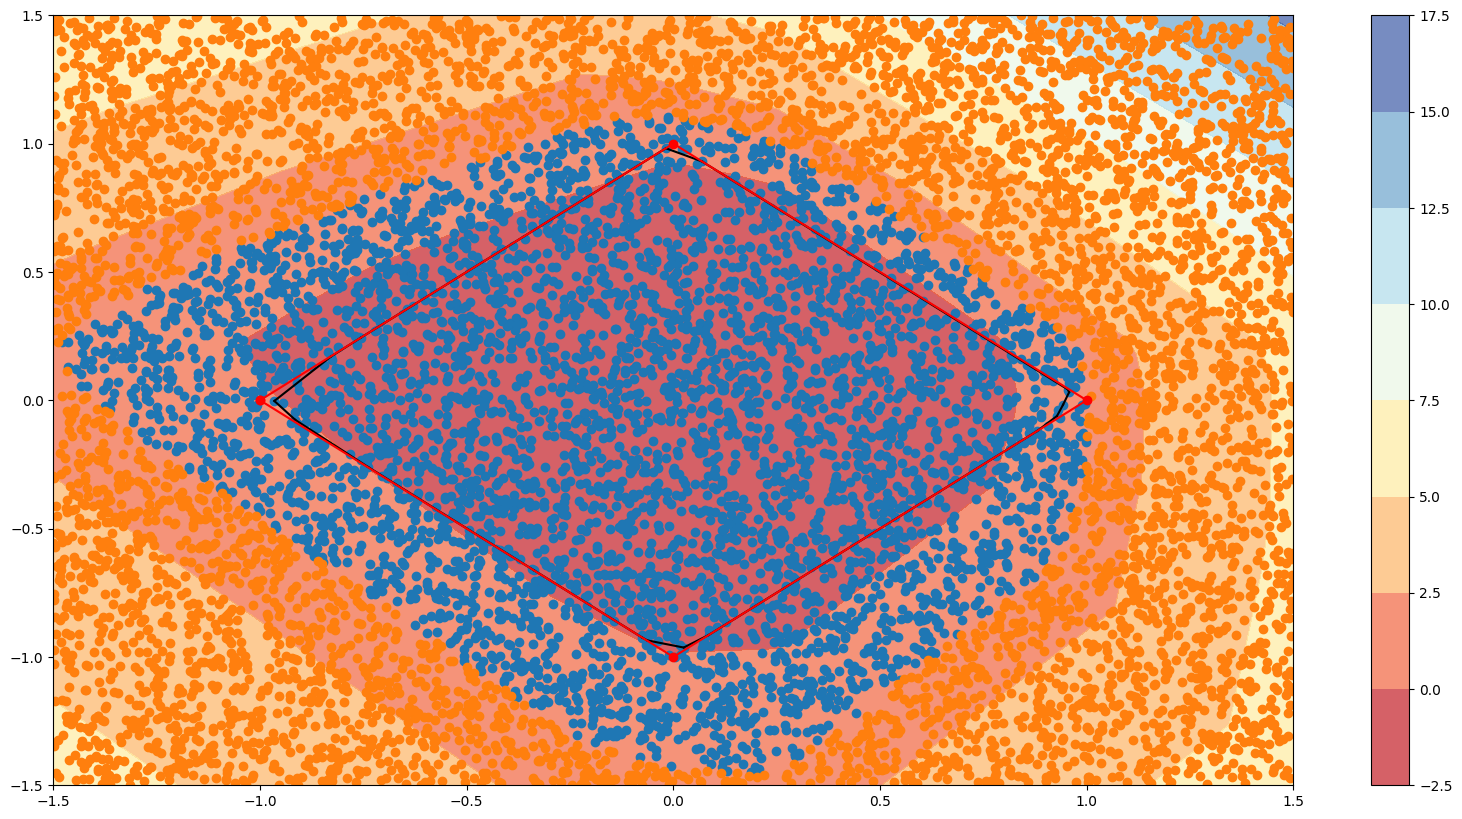

In [45]:
input_data, plots.c = result
plots.plt_mesh()